In [3]:
import pandas as pd
import numpy as np

# Generate date range for one year
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Simulate sales data with seasonality and noise
np.random.seed(42)
sales = (np.sin(np.linspace(0, 3 * np.pi, len(date_rng))) * 200 +
         np.random.normal(loc=500, scale=50, size=len(date_rng))).round()

# Create DataFrame
df = pd.DataFrame({'Date': date_rng, 'Sales': sales})

# Save to CSV file inside the data folder
df.to_csv('data/sales_data.csv', index=False)

# Show first 5 rows
df.head()


,Date,Sales
0,2023-01-01,525.0
1,2023-01-02,498.0
2,2023-01-03,543.0
3,2023-01-04,592.0
4,2023-01-05,509.0


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Sales   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB
None

 Missing Values:
Date     0
Sales    0
dtype: int64

 Summary Stats:
                      Date       Sales
count                  365  365.000000
mean   2023-07-02 00:00:00  542.824658
min    2023-01-01 00:00:00  228.000000
25%    2023-04-02 00:00:00  424.000000
50%    2023-07-02 00:00:00  567.000000
75%    2023-10-01 00:00:00  662.000000
max    2023-12-31 00:00:00  782.000000
std                    NaN  140.634871


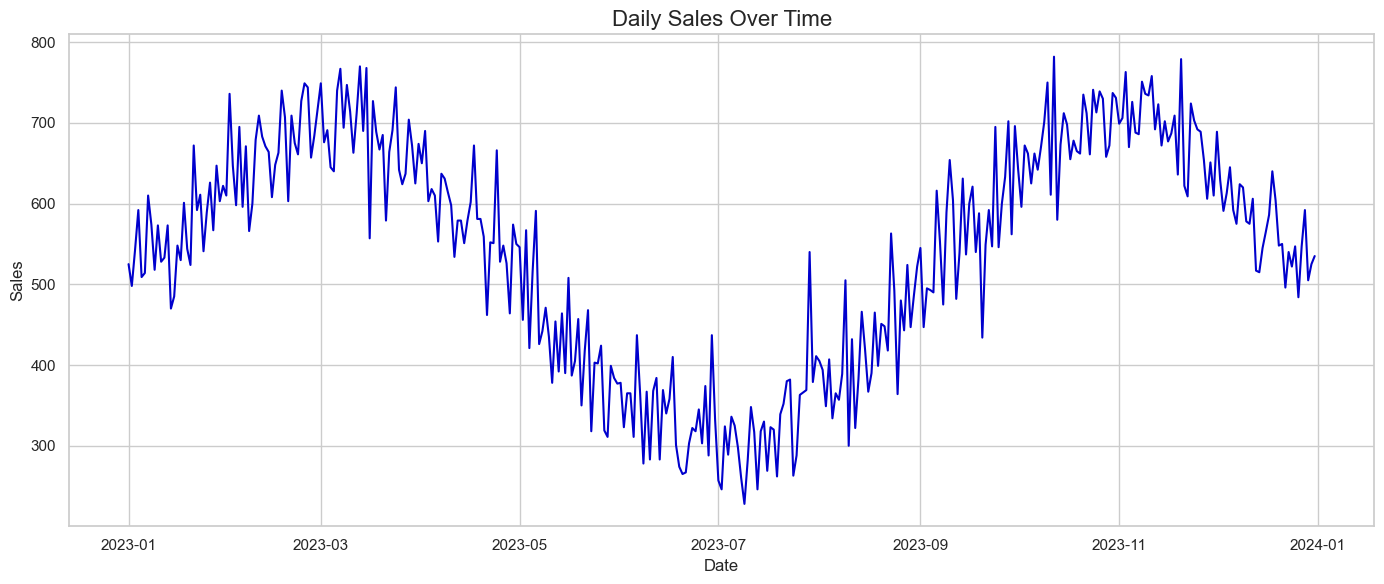

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
sns.set(style="whitegrid")

# Read the dataset
df = pd.read_csv("data/sales_data.csv", parse_dates=["Date"])

# Basic info
print(" Dataset Info:")
print(df.info())
print("\n Missing Values:")
print(df.isnull().sum())
print("\n Summary Stats:")
print(df.describe())

# Line plot of sales over time
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Sales'], color='mediumblue')
plt.title("Daily Sales Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


In [9]:
!pip install statsmodels pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.8 MB/s eta 0:00:00


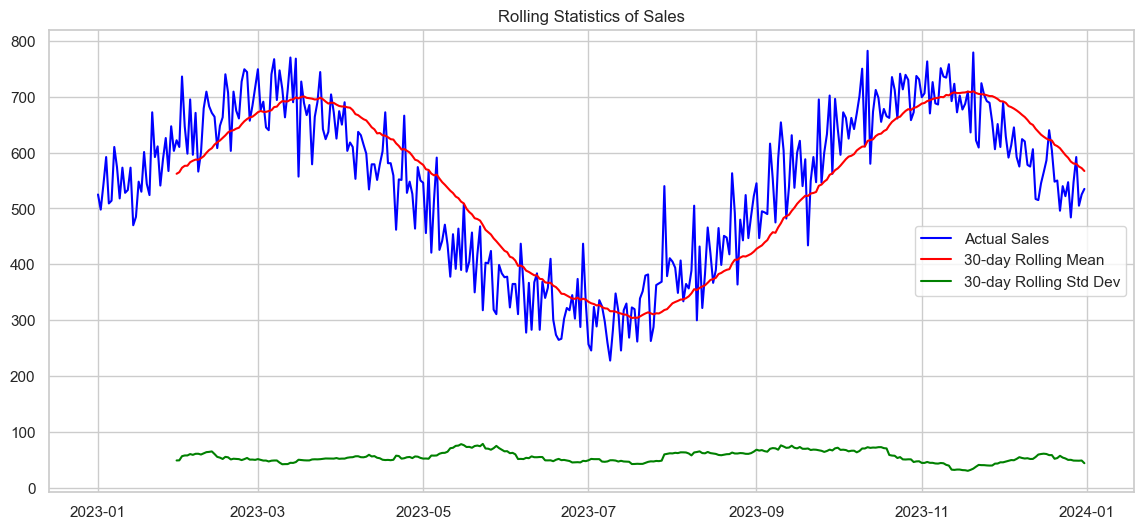

In [11]:
# Rolling mean & std
df.set_index('Date', inplace=True)
rolling_mean = df['Sales'].rolling(window=30).mean()
rolling_std = df['Sales'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(df['Sales'], label='Actual Sales', color='blue')
plt.plot(rolling_mean, label='30-day Rolling Mean', color='red')
plt.plot(rolling_std, label='30-day Rolling Std Dev', color='green')
plt.legend()
plt.title("Rolling Statistics of Sales")
plt.show()


In [13]:
from pmdarima import auto_arima

# Fit auto ARIMA to choose best (p,d,q)
stepwise_model = auto_arima(df['Sales'], seasonal=True, m=7, trace=True)
stepwise_model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=3926.127, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4120.504, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4012.644, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3927.726, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4118.504, Time=0.00 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=3925.532, Time=0.27 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=3924.655, Time=0.11 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=3925.333, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=3900.782, Time=0.14 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=3902.642, Time=0.22 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=3902.644, Time=0.46 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=3924.179, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=3925.115, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1945.392
Date:                Wed, 30 Apr 2025   AIC                           3898.785
Time:                        13:20:31   BIC                           3914.373
Sample:                    01-01-2023   HQIC                          3904.980
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9798      0.015     67.240      0.000       0.951       1.008
ma.L1         -1.8725      0.025    -73.614      0.000      -1.922      -1.823
ma.L2          0.8875      0.025     35.870      0.000       0.839       0.936
sigma2      2552.0383    163.450     15.614      0.000    2231.682    2872.395
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 9.48
Prob(Q):                              0.46   Prob(JB):                         0.01
Heteroskedasticity (H):               0.98   Skew:                             0.14
Prob(H) (two-sided):                  0.90   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

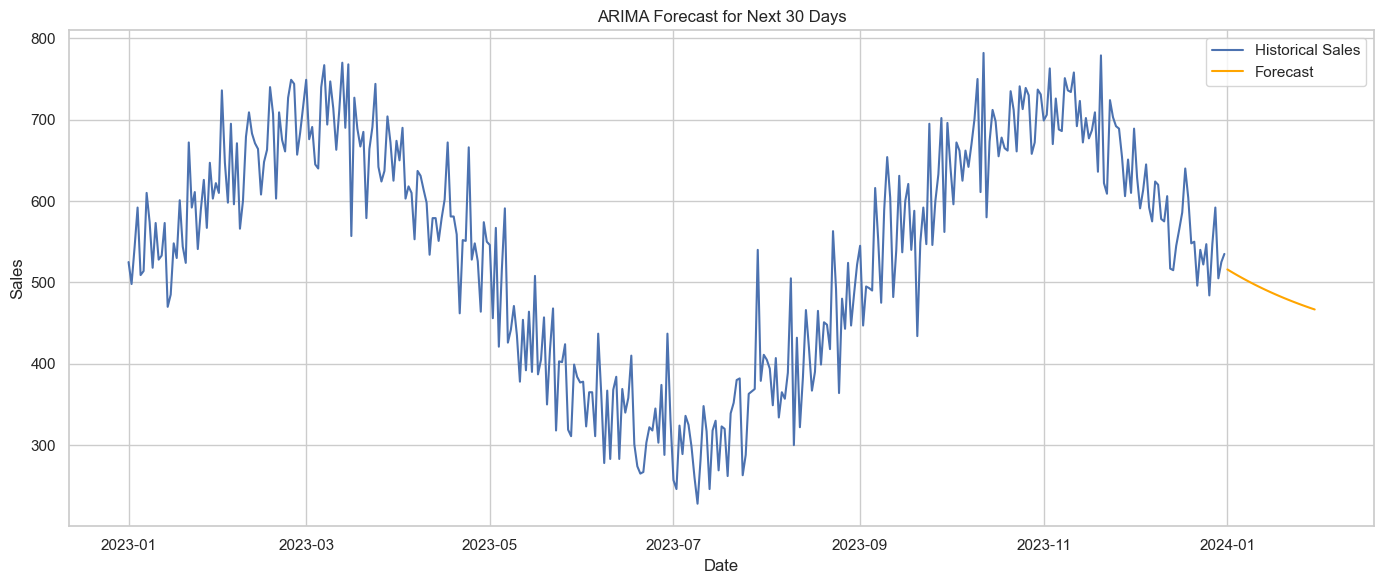

In [15]:
# Forecast next 30 days
n_periods = 30
forecast, conf_int = stepwise_model.predict(n_periods=n_periods, return_conf_int=True)

# Create future date index
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=n_periods)

# Forecast DataFrame
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast})
forecast_df.set_index('Date', inplace=True)

# Plot forecast
plt.figure(figsize=(14,6))
plt.plot(df['Sales'], label='Historical Sales')
plt.plot(forecast_df['Forecast'], label='Forecast', color='orange')
plt.title("ARIMA Forecast for Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
!pip install prophet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.9/917.9 kB 46.6 MB/s eta 0:00:00


In [19]:
from prophet import Prophet

# Prophet requires columns 'ds' and 'y'
prophet_df = df.reset_index()[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

# Initialize and fit model
model = Prophet()
model.fit(prophet_df)


13:21:14 - cmdstanpy - INFO - Chain [1] start processing
13:21:15 - cmdstanpy - INFO - Chain [1] done processing


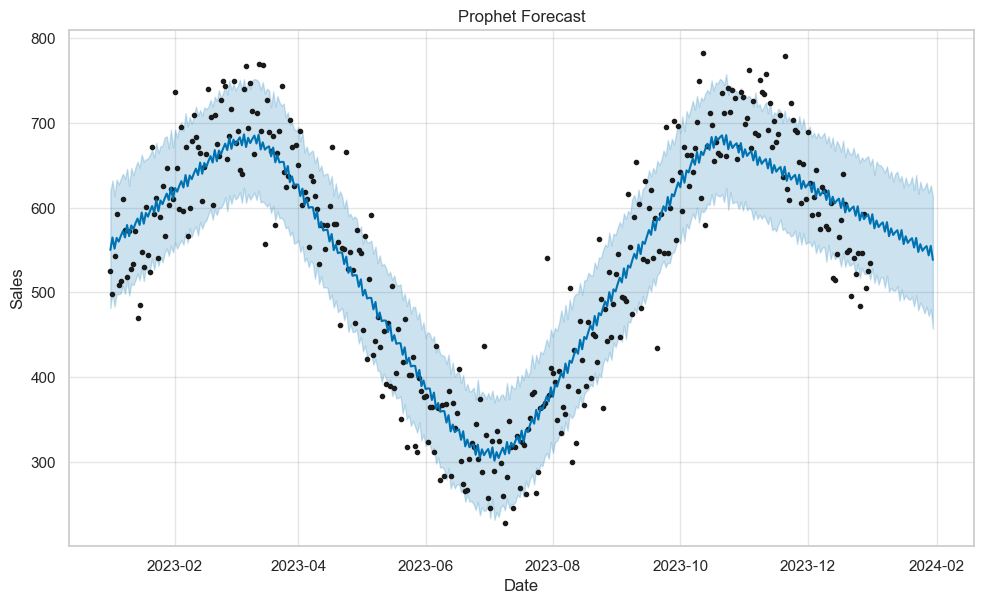

In [21]:
# Create future DataFrame (next 30 days)
future = model.make_future_dataframe(periods=30)

# Forecast
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Prophet Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


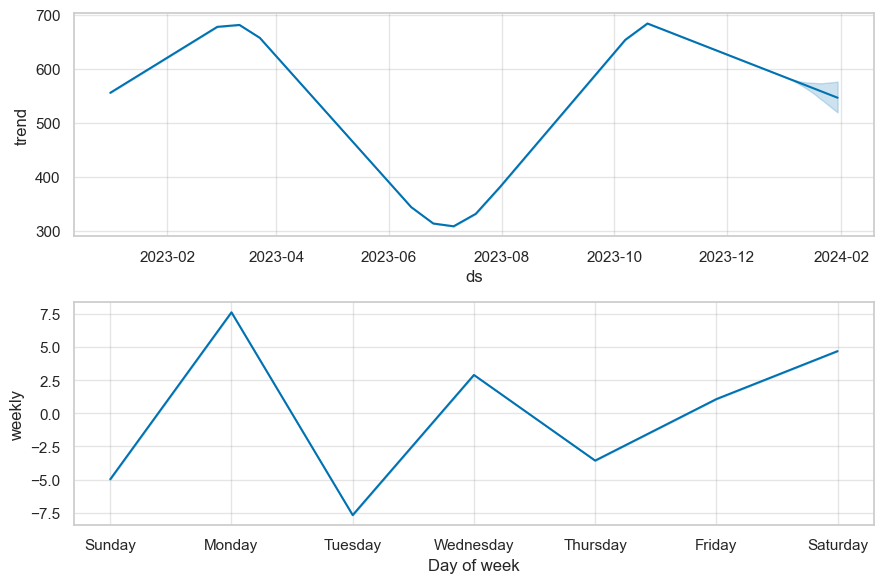

In [23]:
model.plot_components(forecast)
plt.tight_layout()
plt.show()


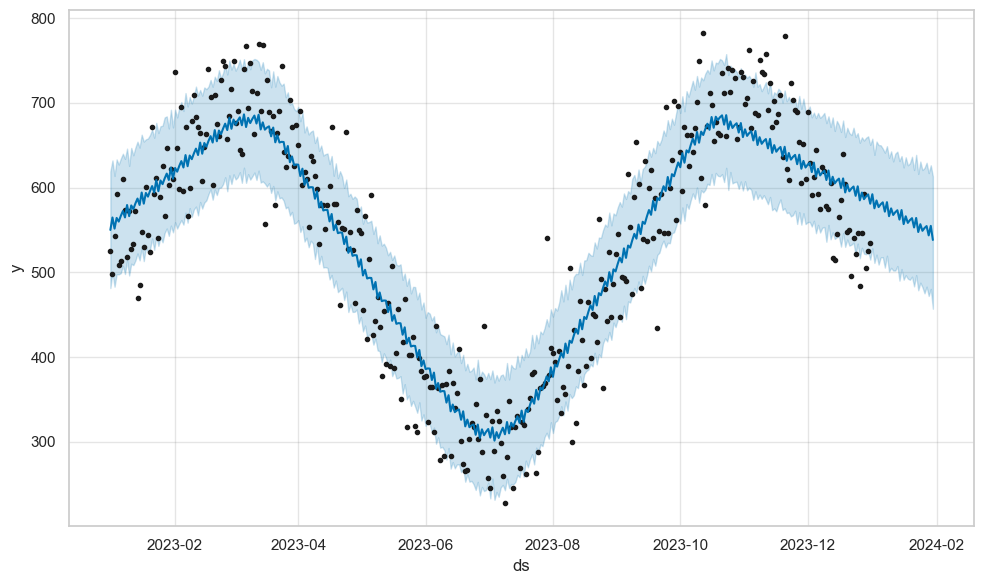

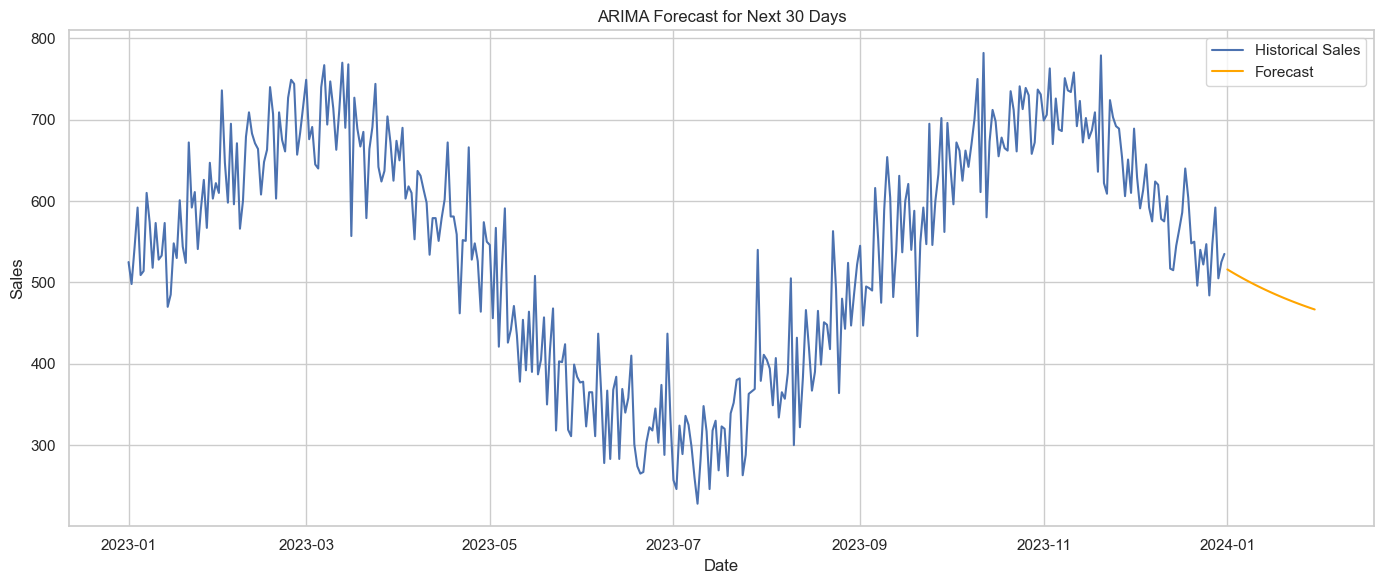

In [25]:
# Save last Prophet forecast
fig1 = model.plot(forecast)
fig1.savefig("images/prophet_forecast.png")

# Save ARIMA forecast
plt.figure(figsize=(14,6))
plt.plot(df['Sales'], label='Historical Sales')
plt.plot(forecast_df['Forecast'], label='Forecast', color='orange')
plt.title("ARIMA Forecast for Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.savefig("images/arima_forecast.png")
